# Notes on NetCDF4-Guides, Tips and Tricks
**by Amani Ahnuar**

In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import metpy as mp
import metpy.constants as constants
import metpy.units as units
import metpy.io as io
import metpy.calc as calc
import metpy.plots as plots
import metpy.plots.ctables as ctables
import metpy.interpolate as itpo
from datetime import datetime

## Preface

**Disclaimer:** I don't own any of the data used here. They are obtained through the [Climate Data Store](https://cds.climate.copernicus.eu/#!/home) and at the date of this notebook writte, the datas are open for free access. Readers do not need to download the same dataset as I will walk through the format of NetCDF4 dataset along the way which if you're also handling the same *.nc* dataset, it should be mostly consistent.

This notebook is intended for reference purpose to those who will be managing and handling datas with NetCDF4 format and for myself to take notes and expand my knowledge and skill. It's written in simple English, so treat it like a note more than a reference haha! I intend to create this notebook to be like so to ease people getting into it. Hence, I will be updating this notebook as I find newer things and will hopefully keep things organised as much as I could. A huge gratitude for those who will be using this as their first stepping stone on embarking the journey towards climatology analysis!

First, reading the dataset using **xarray** is as easy as follow. I'm using xarray since it's very independent in which means it's universal to be used on any other cases. Fortunately, in this case, NetCDF4 format happens to use matrix-like data format which xarray can take huge advantage of.

In [2]:
fn = 'C:/Users/akibi/Desktop/UM Meteorologi/Data/Pressure levels/975hPa.nc'   # Pardon my weird directory tree
ds = xr.open_dataset(fn)     # # pressure levels data from Corpenius Climate Data Store

Looking at the dataset in xarray-format, it's quite interactive where you can *peek datas* and also look at the units of data.

In [3]:
ds

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 721, longitude: 1440, time: 488)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-08-01
Data variables:
    t          (time, expver, latitude, longitude) float32 ...
    u          (time, expver, latitude, longitude) float32 ...
    v          (time, expver, latitude, longitude) float32 ...
    w          (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-17 03:25:17 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Data Structure

The xarray object has 4 general data structures: **values, dims, coords,** and **attrs**.

In [4]:
ds.dims

Frozen(SortedKeysDict({'longitude': 1440, 'latitude': 721, 'expver': 2, 'time': 488}))

*dims* gives a dictionary of the data with its dimensions

In [5]:
ds.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (expver: 2, latitude: 721, longitude: 1440, time: 488)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-08-01
Data variables:
    t          (time, expver, latitude, longitude) float32 ...
    u          (time, expver, latitude, longitude) float32 ...
    v          (time, expver, latitude, longitude) float32 ...
    w          (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-17 03:25:17 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...>

We can see this data has: Temperature, U-component of wind, V-component of wind, Vertical velocity
Various pressure levels with 100hPa scale

In [6]:
ds['t'].values

array([[[[251.24901, 251.24901, 251.24901, ..., 251.24901, 251.24901,
          251.24901],
         [251.26654, 251.26654, 251.26654, ..., 251.2679 , 251.2679 ,
          251.26654],
         [251.28543, 251.28543, 251.28543, ..., 251.28677, 251.28677,
          251.28677],
         ...,
         [262.13455, 262.13724, 262.1413 , ..., 262.12915, 262.1305 ,
          262.1332 ],
         [262.25998, 262.25998, 262.26266, ..., 262.25458, 262.25592,
          262.25864],
         [262.26807, 262.26807, 262.26807, ..., 262.26807, 262.26807,
          262.26807]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,   

*values* gives the numpy array of the data, which also depends on which part of the data you're looking at

In [7]:
ds.coords

Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-08-01

*coords* is almost the same as values for the "coordinates sectoin". It's very specific but it is far greater and useful especially for the use of indexing and labeling

In [8]:
ds.attrs

{'Conventions': 'CF-1.6',
 'history': '2020-09-17 03:25:17 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.internal-1600311244.1275876-21073-24-c50dcf85-843f-450f-bf90-c083c44d70ec.nc /cache/tmp/c50dcf85-843f-450f-bf90-c083c44d70ec-adaptor.mars.internal-1600311244.1285372-21073-6-tmp.grib'}

*attrs* gives the metadata information of the data

## Information of Data and Plotting!

I'd like to start our guide with visualisation since humans are more likely to be engaged on visual stimuli. Visual representations can give good information while retaining the appeal to humans. That way, I'll get you stoked first before jumping into the statistical technical bits.

This is very specific for this particular NetCDF4 dataset obtained form Copernicus Climate Data Store. It seems that this data--the pressure levels--is very similar to the single levels. Hence, it should be noted that the information and methods used here will probably be very much similar to the single levels data.

Another thing to note is there are two different data sections: one with **expver 1** and another with **expver 5**. There's a difference between both datasets, more information at this link [here](https://confluence.ecmwf.int/pages/viewpage.action?pageId=173385064). But, just to explain it as simple as I can, expver 1 is more "actual data" while expver 5 is some sort of "padded" datas version. I'll be **using expver 1 for the entire notebook**.

**Time :**
The first good thing to note is that the data for the time of this dataset is using datetime64 datatype. Peeking the data can already show you this or just by running the handy `ds.coords` which will give you the peek along with the datatype format.

From this, we can use the basic various time-series analysis common to the datatype and also other modules that support it such as `pandas`. This data is based on **monthly** measurement, so we'll see that the timestamps are actually on monthly basis below.

A handy trick is by using the `.dt` method which gives you access to different datetime components! For example for *month*:

In [9]:
ds['time'].dt.month

<xarray.DataArray 'month' (time: 488)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-08-01

### Standard X-Y Plot

We can just plot it as readily since it's already in that format which is supported well by all, `numpy`, `matplotlib` and `pandas`. Below is plotting the temperature (K) against the time of a certain position, in this case my home country Malaysia (4N, 102E).

Text(0.5, 1.0, 'Temperature Across Time at 975hPa')

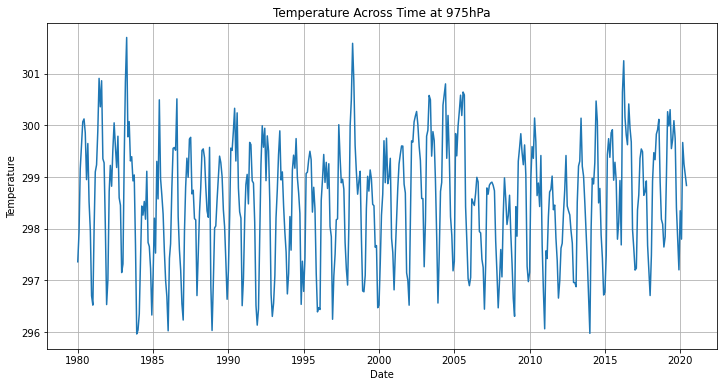

In [10]:
MYlat_index = np.where(ds['latitude'].values == 4)[0]      # Finding the index of latitude where it is equal to 4 degree
MYlong_index = np.where(ds['longitude'].values == 102)[0]  # Finding the index of longitude where it is equal to 102 degree

# Then we plot them using standard x-y plot function
plt.figure(figsize=(12,6))
plt.plot(ds['time'].values, ds['t'].values[:,0,MYlat_index,MYlong_index]) # For the [a,b,c,d], the indexing goes as follows
plt.grid()                                                                # a is for the time, : means using all the time data
plt.xlabel('Date')                                                        # b is for expver, 0 is "expver 1" and "2 is expver 5"
plt.ylabel('Temperature')                                                 # c and d is latitude, longitude
plt.title('Temperature Across Time at 975hPa')

Inference: * *ahem, ahem* * This shows that Malaysia has been quite fluctuating in temperature throughout 20 decades ago. It may look like insignificant, but bear in mind, we're only looking at 975hPa geoheight level. The fluctuation may very be the circulation of hot and cold air moving vertically since Malaysia is very equatorial as it gets, hence a lot of fluctuations hot and cold, as well as drought and rainfall.

**Now let's try on another data which has more than just *temperature, horizontal and veritcal wind velocity***.
This next dataset is based on single level measurement.

In [13]:
fns = 'C:/Users/akibi/Desktop/UM Meteorologi/Data/Single levels/single.nc'   # Pardon my weird directory tree
dss = xr.open_dataset(fns)     # # pressure levels data from Corpenius Climate Data Store

In [61]:
dss.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (expver: 2, latitude: 721, longitude: 1440, time: 500)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    crr        (time, expver, latitude, longitude) float32 ...
    sst        (time, expver, latitude, longitude) float32 ...
    ssrc       (time, expver, latitude, longitude) float32 ...
    strc       (time, expver, latitude, longitude) float32 ...
    sp         (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conve

We can see there are: 10m u-component of wind, 10m v-component of wind, 2m temperature, Convective rain rate, Sea surface temperature, Surface net solar radiation, clear sky, Surface net thermal radiation, clear sky, Surface pressure, Total precipitation

Now, let's do a bunch of plots so we can demonstrate the ease of data analysis for this dataset. But before all that, **it's always important to CHECK the dimensions and values to make sure they're clean**.

In [197]:
dss

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 721, longitude: 1440, time: 500)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    crr        (time, expver, latitude, longitude) float32 ...
    sst        (time, expver, latitude, longitude) float32 ...
    ssrc       (time, expver, latitude, longitude) float32 ...
    strc       (time, expver, latitude, longitude) float32 ...
    sp         (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-29 01:18:28 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [22]:
len(dss['time'])

500

### Heatmap with 2D data

We can see there are 500 points in time and it still uses the same NetCDF4 format. This gives us advantage of knowledge on how to index through the dataset. With that, if we need to plot only a single timestamp of data, we need to really be specific of which timestamp we want to use. In this case, let's try plotting a heatmap so we can learn how to plot heatmaps using 2D data which means only one timestamp.

Text(0.5, 1.0, 'SST on January 2020')

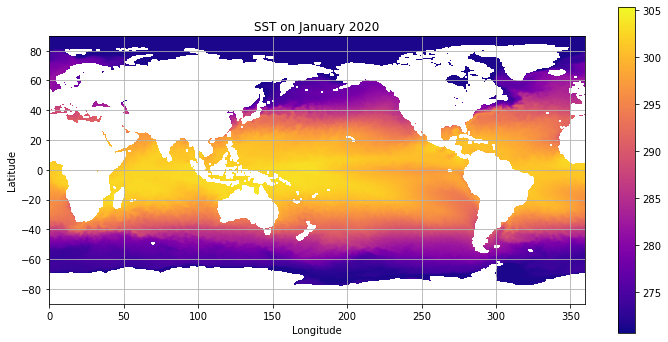

In [112]:
# We need this for calibrating the plot according to the longitude and latitude
lomn = dss['longitude'].values.min()
lomx = dss['longitude'].values.max()
lamn = dss['latitude'].values.min()
lamx = dss['latitude'].values.max()

# Getting the 2D data of SST through the whole world for one single timestamp
maskyear2020 = (dss['time'].dt.year == 2020)    # Create a mask of which subset of data we need, in this case the year 2020
maskmonth1 = (dss['time'].dt.month == 1)        # and here the month 1, January
dss_1_2020 = dss['sst'][maskyear2020 & maskmonth1]    # Then, we apply the mask on the sea surfact temperature data

# Now we plot them using plt.imshow for heatmap plot
plt.figure(figsize=(12,6))
plt.imshow(dss_1_2020.values[0,0], cmap='plasma', extent=[lomn,lomx,lamn,lamx])
# 'extent' parameter takes in longmin, longmax, latmin, latmax to calibrate the heatmap accordingly
# 'thecmap' parameter is not compulsory but useful in keeping with the theme

plt.colorbar()  # a handy tool to show the colorbar on the side of the plot
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SST on January 2020')

Inference: As obvious as it is, the equatorial where between latitude -30 to 30 are the hottest in sea surfact temperature. The more interesting question would be (to be investigated in future) how hot did it get? How wide is the hot SST band get? When the band is hottest or coldest, what other events are occuring during that time?

### Boxplots? Let's do that weird thing!

Even though boxplots are the least visually-pleasing plots, they provide some of the basics meaningful statistics information. In case *"basic statistics"* is not something you've learned, do not worry! It's better to know what you don't know now than never. Worry not, basic statistics will be covered later. But for now, the basic information are:

- Mean (a fancy way of saying average zzz)
- Median (the middle datapoint inside a data)
- Standard Deviation (the measure of how different it is from one bulk to another in the same data; higher = more different)
- Variance (squared of std, the greater value, the more varying)
- Quartile (quarter-th of data, usually in 1st, 2nd, 3rd)
- Interquartile Range (the value of Q3 - Q1)
- Outliers (data too far away from the distribution, usually more than 1.5IQR of Q3 or less than 1.5IQR of Q1)
- Correlation (a measure of how one set of data relate to another, keep in mind it may not conclude causal-effect relationship)

Okay I think that is just the right things you need to know. Again, don't worry if some of them (or none of them) make sense of understandable. We'll walk through them together. Afterall, **the best way to learn is to do**.

A boxplot is a plot used to describe a certain ditribution of values. A normal distribution is known as bell-shaped where the amount of data in the lowest and highest value is the least and most of the data accumulate in the center where the average/mean and median is about the same value. A good distribution is a normal distribution. It's the realistic distribution. For example, in terms of wealth, the world **should** have about as many people in the normal-rich category, the least in the poor and rich-rich category. A sweked distribution means the distribution accumulates biasedly towards one side. A  right-skewed distribution means **A LOT OF PEOPLE** are poor and as the wealthy-meter goes up, less people ocupy the space. This is usually what the world disappointingly lies right now. A lot of rich people are making the poor even poorer and harder to get rich. They're using the power to create this steep gradient and prevent the poor to be rich and help the rich stay rich or get richer.

Okay, enough with the social blabber. Let's do the boxplot on total precipitation! Precipitation usually refers to liquid formation, rain or snow in a certain area. We'll try and do boxplot on places that have 4-seasons weather. Eastern Washington happens to have one of the most distinctive seasons. So, we'll look into that!

In [188]:
# Here, I'm masking into 3-month basis, so we can see "seasonal" differences!
monthDJF = (dss['time'].dt.month.isin([12,1,2]))
monthMAM = (dss['time'].dt.month.isin([3,4,5]))
monthJJA = (dss['time'].dt.month.isin([6,7,8]))
monthSON = (dss['time'].dt.month.isin([9,10,11]))

# Finding the index of latitude and longitude of Eastern Washington
EWlat_index = np.where(ds['latitude'].values == 47)[0]      # Finding the index of latitude where it is equal to 4 degree
EWlong_index = np.where(ds['longitude'].values == 118)[0]  # Finding the index of longitude where it is equal to 102 degree

# Now that's done, we need to have all the data as 1 value only, total precipitation
# that means, we will have to choose only one position to look at, in this case the Eastern Washington
TP_DJF = dss['tp'][monthDJF].values[:,0,EWlat_index,EWlong_index]
TP_MAM = dss['tp'][monthMAM].values[:,0,EWlat_index,EWlong_index]
TP_JJA = dss['tp'][monthJJA].values[:,0,EWlat_index,EWlong_index]
TP_SON = dss['tp'][monthSON].values[:,0,EWlat_index,EWlong_index]

# The problem with these, they are actually lists of lists of single values (i know, very confusing). Look here what I meant
print(TP_DJF)

[[1.9802898e-04]
 [5.2335113e-04]
 [1.1315942e-04]
 [2.4046004e-04]
 [2.4046004e-04]
 [5.1628053e-04]
 [1.8388033e-04]
 [3.7483126e-04]
 [1.6030669e-04]
 [1.6973913e-04]
 [2.1924078e-04]
 [2.3574382e-04]
 [2.8053671e-04]
 [2.7582049e-04]
 [3.0411035e-04]
 [2.5224686e-04]
 [2.6638806e-04]
 [2.1217018e-04]
 [2.5460124e-04]
 [4.9977750e-04]
 [2.5224686e-04]
 [9.4294548e-05]
 [1.9095093e-04]
 [2.4753064e-04]
 [3.0411035e-04]
 [2.5224686e-04]
 [2.1452457e-04]
 [2.3338944e-04]
 [2.7346611e-04]
 [2.8996915e-04]
 [2.5931746e-04]
 [1.2258440e-04]
 [3.0882657e-04]
 [1.3908744e-04]
 [1.4144927e-04]
 [2.8053671e-04]
 [3.0175596e-04]
 [1.6502291e-04]
 [1.9802898e-04]
 [1.2258440e-04]
 [2.0509958e-04]
 [1.4144927e-04]
 [1.0372698e-04]
 [4.6441704e-04]
 [3.7247688e-04]
 [1.9566715e-04]
 [1.2966245e-04]
 [1.7916411e-04]
 [1.0372698e-04]
 [1.1315942e-04]
 [2.9939413e-04]
 [1.0844320e-04]
 [8.7223947e-05]
 [2.1452457e-04]
 [1.4144927e-04]
 [1.6737729e-04]
 [9.9010766e-05]
 [1.2966245e-04]
 [1.8152595e-0

In [189]:
# So, let's flatten those out to be normal lists of data again
TP_DJF = np.array([item for sublist in TP_DJF for item in sublist])
TP_MAM = np.array([item for sublist in TP_MAM for item in sublist])
TP_JJA = np.array([item for sublist in TP_JJA for item in sublist])
TP_SON = np.array([item for sublist in TP_SON for item in sublist])

In [190]:
# Now it's better
print(TP_DJF)

[1.9802898e-04 5.2335113e-04 1.1315942e-04 2.4046004e-04 2.4046004e-04
 5.1628053e-04 1.8388033e-04 3.7483126e-04 1.6030669e-04 1.6973913e-04
 2.1924078e-04 2.3574382e-04 2.8053671e-04 2.7582049e-04 3.0411035e-04
 2.5224686e-04 2.6638806e-04 2.1217018e-04 2.5460124e-04 4.9977750e-04
 2.5224686e-04 9.4294548e-05 1.9095093e-04 2.4753064e-04 3.0411035e-04
 2.5224686e-04 2.1452457e-04 2.3338944e-04 2.7346611e-04 2.8996915e-04
 2.5931746e-04 1.2258440e-04 3.0882657e-04 1.3908744e-04 1.4144927e-04
 2.8053671e-04 3.0175596e-04 1.6502291e-04 1.9802898e-04 1.2258440e-04
 2.0509958e-04 1.4144927e-04 1.0372698e-04 4.6441704e-04 3.7247688e-04
 1.9566715e-04 1.2966245e-04 1.7916411e-04 1.0372698e-04 1.1315942e-04
 2.9939413e-04 1.0844320e-04 8.7223947e-05 2.1452457e-04 1.4144927e-04
 1.6737729e-04 9.9010766e-05 1.2966245e-04 1.8152595e-04 1.6737729e-04
 1.3437122e-04 2.5460124e-04 2.6874989e-04 2.4281442e-04 9.1940165e-05
 5.0449371e-04 4.1491538e-04 7.3082745e-05 2.1688640e-04 3.4183264e-04
 1.650

In [191]:
# To make a boxplot, you'll have to use 'pandas' module. We need to stich all the data above
# into one single dataframe-pandas dataframe
TP_3monthly = pd.DataFrame([TP_DJF,TP_MAM,TP_JJA,TP_SON])

In [192]:
TP_3monthly

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.000198,0.000523,0.000113,0.000240,0.000240,0.000516,0.000184,0.000375,0.000160,0.000170,...,0.000309,0.000210,0.000325,0.000064,0.000083,0.000014,0.000276,0.000165,0.000203,NaN
1,0.000387,0.000820,0.001921,0.000290,0.000929,0.000945,0.000903,0.000721,0.002011,0.000504,...,0.000691,0.000196,0.000665,0.001172,0.000149,0.000059,0.001294,0.000125,0.000231,0.001334
2,0.001450,0.003399,0.001964,0.001778,0.004121,0.002581,0.001023,0.003854,0.002103,0.001294,...,0.001829,0.000785,0.004378,0.001917,0.001146,0.001756,0.003680,0.003720,NaN,NaN
3,0.001353,0.000644,0.000502,0.001049,0.000571,0.000311,0.000724,0.001108,0.000245,0.002367,...,0.000540,0.003058,0.000295,0.000057,0.000361,0.001195,0.000339,NaN,NaN,NaN


Taking a look at it, they're not in columns, but in rows. Let's flip that with transpose function `.T` and give column names for them so they have meanings.

In [193]:
TP_3monthly = TP_3monthly.T
TP_3monthly.columns = ['DJF','MAM','JJA','SON']
TP_3monthly

,DJF,MAM,JJA,SON
0,0.000198,0.000387,0.001450,0.001353
1,0.000523,0.000820,0.003399,0.000644
2,0.000113,0.001921,0.001964,0.000502
3,0.000240,0.000290,0.001778,0.001049
4,0.000240,0.000929,0.004121,0.000571
...,...,...,...,...
121,0.000014,0.000059,0.001756,0.001195
122,0.000276,0.001294,0.003680,0.000339
123,0.000165,0.000125,0.003720,NaN
124,0.000203,0.000231,NaN,NaN


Pandas dataframe has some useful tricks up its sleeve. Some handy things you can do are:
- `pd.head()` or `pd.tail()` (to peek the data head or tail)
- `pd.mean()` (obviously...)
- `pd.median()` (...)
- You know what, the best on is `pd.describe()`!

In [194]:
TP_3monthly.describe()

,DJF,MAM,JJA,SON
count,125.000000,126.000000,124.000000,123.000000
mean,0.000233,0.000701,0.002494,0.000767
std,0.000121,0.000537,0.001412,0.000613
min,0.000014,0.000059,0.000462,0.000045
25%,0.000141,0.000316,0.001566,0.000308
50%,0.000215,0.000582,0.002078,0.000613
75%,0.000281,0.000922,0.003207,0.001113
max,0.000606,0.002812,0.008947,0.003058


It shows **everything that will be used for boxplot, every bit of information**. So, now let's look at the boxplot!

Text(0, 0.5, 'Total Precipitation (m)')

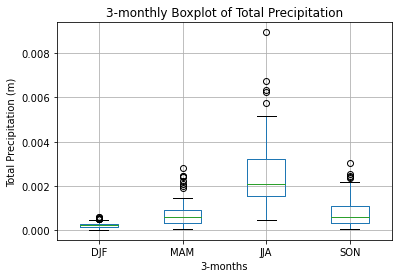

In [198]:
# Honestly, it's as easy as
TP_3monthly.boxplot()
plt.title('3-monthly Boxplot of Total Precipitation')
plt.xlabel('3-months')
plt.ylabel('Total Precipitation (m)')

Inference: We can almost see there is a "wave-like" pattern or in other words, periodic and it seems consistent. We can be more sure about it if we separate them differently by years where we can see the periodic "up and down".

**Okay, I'm intrigued to see how it spreads out across years hahaha... LET'S DO IT!**